In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

In [2]:
unfiltered_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/'
conf05_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/'
conf09_input = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf09/IDR_outputs/'
output_dir = '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/plotting/'

In [7]:
def samples_to_replicates(row):
    return '{}_{}ng_{}hr'.format(row['line'], row['dox ng'], row['hours'])
    
manifest = pd.read_excel('/home/bay001/projects/kris_apobec_20200121/permanent_data/lenti_bulk_replicate_timecourse_IDs.xlsx')
manifest['SampleID'] = manifest.apply(samples_to_replicates, axis=1)

### Reading in and plotting IDR Samples for each timepoint ###

In [140]:
ids = defaultdict(list)
for row in manifest.iterrows():
    ids[row[1]['SampleID']].append('Sample{}_'.format(row[1]['sample']))
    ids[row[1]['SampleID']].append('Sample_{}_'.format(row[1]['sample']))

samples = {}
for k,v in ids.items():
    for value in v:
        try:
            samples[k] = sorted(glob.glob(os.path.join(unfiltered_input, '{}*.tsv'.format(value))))[0]
        except IndexError:
            pass

In [141]:
def return_idr_value(row):
    scaled_score = row['score']
    if scaled_score == 1000:
        return 0
    else: 
        scaled_score_new = scaled_score/-125
        return 2 ** scaled_score_new

In [142]:
names = ['chrom','start','end','name','score','strand','local','global','rep1start','rep1end','rep1editc','rep2start','rep2end','rep2editc']

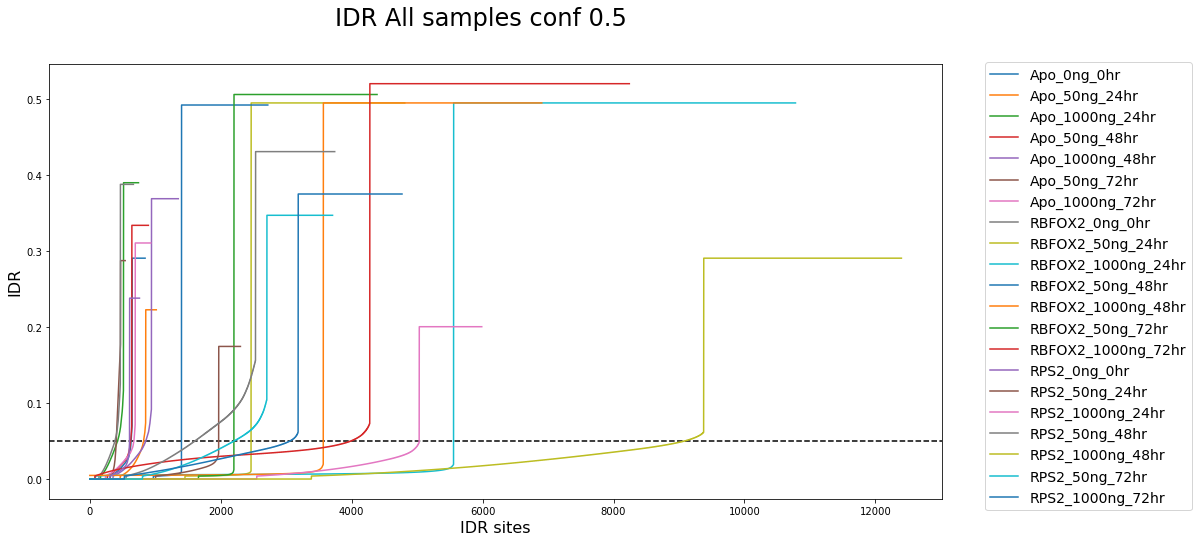

In [143]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('IDR All samples conf 0.5', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.savefig(output_dir + 'IDR_all_samples.svg', dpi=300, bbox_inches='tight')

In [124]:
IDR_24_keys = ['Apo_0ng_0hr', 'Apo_50ng_24hr', 'Apo_1000ng_24hr', 'RBFOX2_0ng_0hr', 'RBFOX2_50ng_24hr', 'RBFOX2_1000ng_24hr']

IDR_24_samples = {key: samples[key] for key in IDR_24_keys}
IDR_24_samples

{'Apo_0ng_0hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample1_0_v_Sample2_0_0.5_filter_IDR.tsv',
 'Apo_50ng_24hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample_3_0_v_Sample4_0_0.5_filter_IDR.tsv',
 'Apo_1000ng_24hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample5_0_v_Sample_6_0_0.5_filter_IDR.tsv',
 'RBFOX2_0ng_0hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample15_0_v_Sample16_0_0.5_filter_IDR.tsv',
 'RBFOX2_50ng_24hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample17_0_v_Sample18_0_0.5_filter_IDR.tsv',
 'RBFOX2_1000ng_24hr': '/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/conf05/IDR_outputs/Sample19_0_v_Sample20_0_0.5_filter_IDR.tsv'}

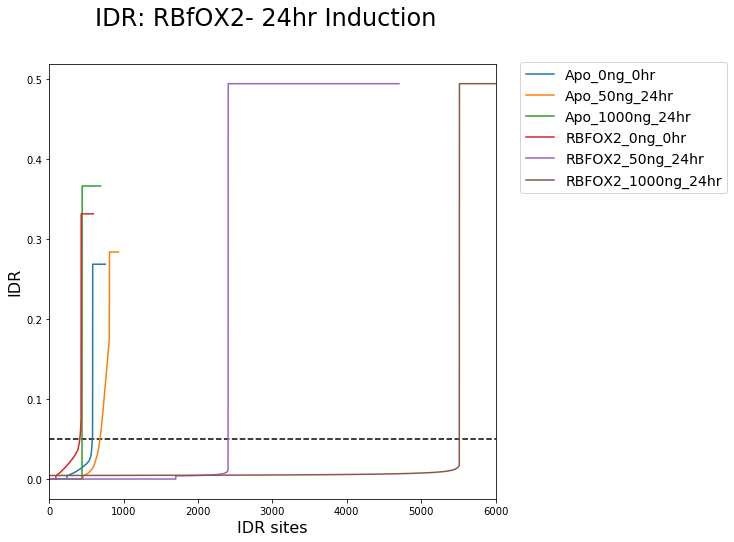

In [144]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RBfOX2- 24hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_24_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,6000)
plt.savefig(output_dir + 'IDR_RBFOX2_24hr_samples.svg', dpi=300, bbox_inches='tight')

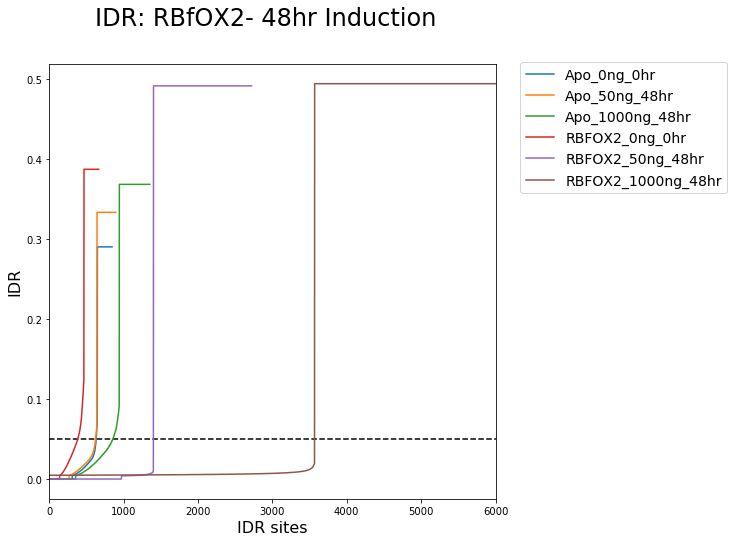

In [145]:
IDR_48_keys = ['Apo_0ng_0hr', 'Apo_50ng_48hr', 'Apo_1000ng_48hr', 'RBFOX2_0ng_0hr', 'RBFOX2_50ng_48hr', 'RBFOX2_1000ng_48hr']

IDR_48_samples = {key: samples[key] for key in IDR_48_keys}


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RBfOX2- 48hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_48_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,6000)
plt.savefig(output_dir + 'IDR_RBFOX2_48hr_samples.svg', dpi=300, bbox_inches='tight')

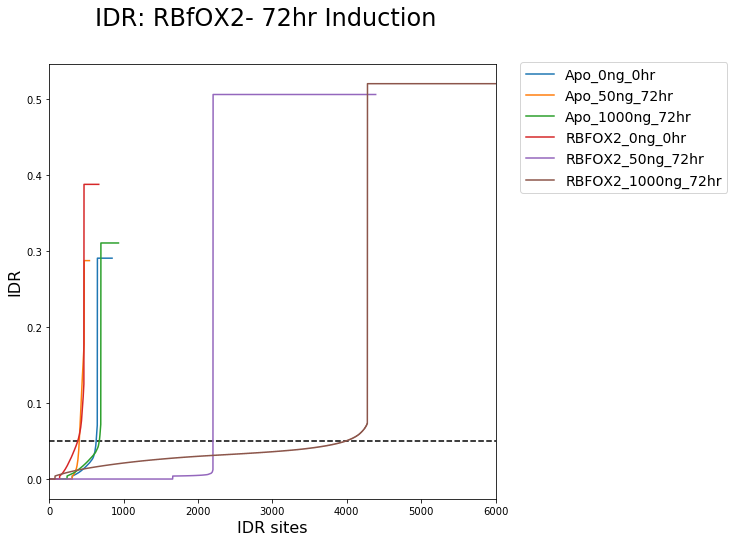

In [146]:
IDR_72_keys = ['Apo_0ng_0hr', 'Apo_50ng_72hr', 'Apo_1000ng_72hr', 'RBFOX2_0ng_0hr', 'RBFOX2_50ng_72hr', 'RBFOX2_1000ng_72hr']

IDR_72_samples = {key: samples[key] for key in IDR_72_keys}


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RBfOX2- 72hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_72_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,6000)
plt.savefig(output_dir + 'IDR_RBFOX2_72hr_samples.svg', dpi=300, bbox_inches='tight')

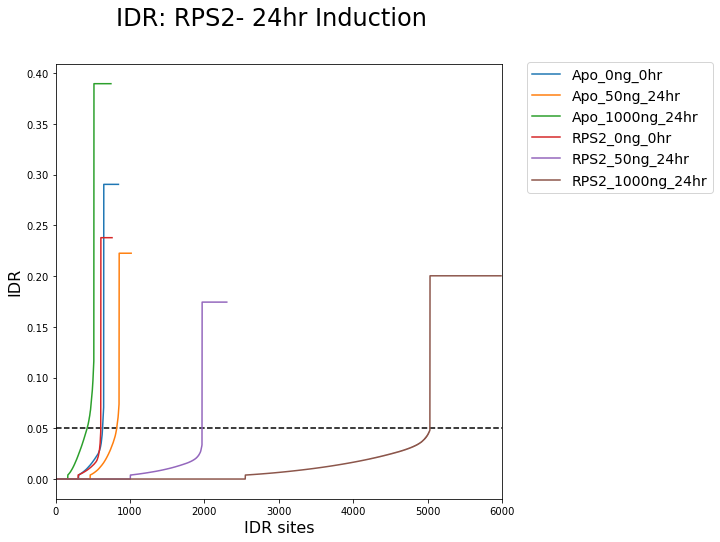

In [147]:
IDR_RPS_24_keys = ['Apo_0ng_0hr', 'Apo_50ng_24hr', 'Apo_1000ng_24hr', 'RPS2_0ng_0hr', 'RPS2_50ng_24hr', 'RPS2_1000ng_24hr']

IDR_RPS_24_samples = {key: samples[key] for key in IDR_RPS_24_keys}


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RPS2- 24hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_RPS_24_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,6000)
plt.savefig(output_dir + 'IDR_RPS2_24hr_samples.svg', dpi=300, bbox_inches='tight')

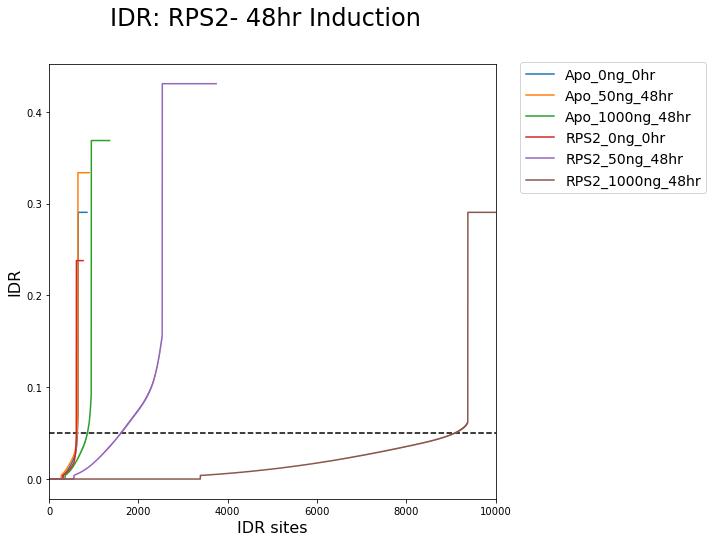

In [148]:
IDR_RPS_48_keys = ['Apo_0ng_0hr', 'Apo_50ng_48hr', 'Apo_1000ng_48hr', 'RPS2_0ng_0hr', 'RPS2_50ng_48hr', 'RPS2_1000ng_48hr']

IDR_RPS_48_samples = {key: samples[key] for key in IDR_RPS_48_keys}


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RPS2- 48hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_RPS_48_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,10000)
plt.savefig(output_dir + 'IDR_RPS2_48hr_samples.svg', dpi=300, bbox_inches='tight')

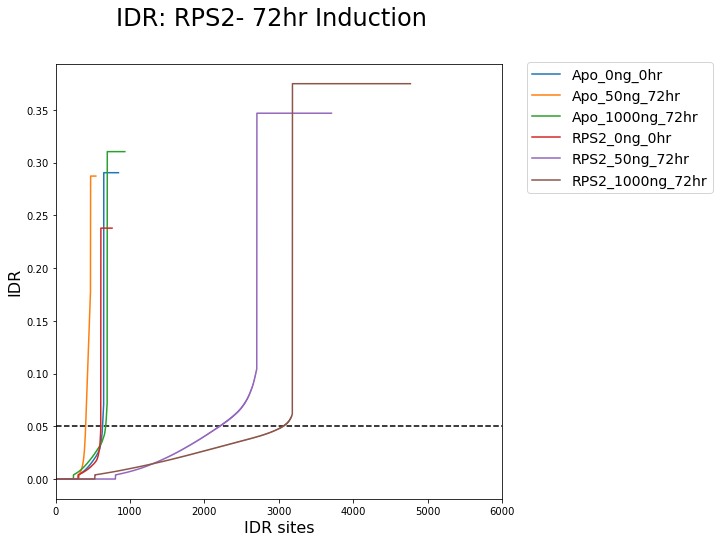

In [149]:
IDR_RPS_72_keys = ['Apo_0ng_0hr', 'Apo_50ng_72hr', 'Apo_1000ng_72hr', 'RPS2_0ng_0hr', 'RPS2_50ng_72hr', 'RPS2_1000ng_72hr']

IDR_RPS_72_samples = {key: samples[key] for key in IDR_RPS_72_keys}


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('IDR: RPS2- 72hr Induction', fontsize=24)
ax.axhline(0.05, ls='--', color='black')

for k,v in IDR_RPS_72_samples.items():
    
    
    idr = pd.read_csv(v, sep='\t', names=names)
    idr['IDR'] = idr.apply(return_idr_value, axis=1)
    
    ax.plot(np.arange(len(idr['IDR'])), np.sort(idr['IDR']), label=k)
    ax.legend(bbox_to_anchor=(1.04,1.02), loc="upper left", fontsize=14)

plt.xlabel('IDR sites', fontsize=16)
plt.ylabel('IDR', fontsize=16)
plt.xlim(0,6000)
plt.savefig(output_dir + 'IDR_RPS2_72hr_samples.svg', dpi=300, bbox_inches='tight')